In [37]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('/kaggle/input/consumer-complaint-database/rows.csv', nrows=99999) # limiting the rows
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


# **Exploratory Data Analysis and Feature Engineering**

In [3]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
29904,03/23/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,The Summer of XX/XX/2018 I was denied a mortga...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,NaN,NaN,Consent provided,Web,03/23/2019,Closed with explanation,Yes,NaN,3189109
30629,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,220XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187982
30735,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187954
30795,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,787XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188091
30807,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,951XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188119


In [29]:
col = ['Product', 'Consumer complaint narrative']
df1 = df[col]

In [32]:
df.head()

,Product,Consumer complaint narrative
29904,"Credit reporting, credit repair services, or o...",The Summer of XX/XX/2018 I was denied a mortga...
30629,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30735,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30795,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30807,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...


In [7]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [8]:
category_to_id

{'Credit reporting, credit repair services, or other personal consumer reports': 0,
 'Debt collection': 1,
 'Student loan': 2,
 'Mortgage': 3,
 'Credit card or prepaid card': 4,
 'Checking or savings account': 5,
 'Money transfer, virtual currency, or money service': 6,
 'Vehicle loan or lease': 7,
 'Payday loan, title loan, or personal loan': 8}

In [9]:
df.head()

,Product,Consumer complaint narrative,category_id
29904,"Credit reporting, credit repair services, or o...",The Summer of XX/XX/2018 I was denied a mortga...,0
30629,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...,0
30735,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...,0
30795,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...,0
30807,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...,0


<Figure size 576x432 with 0 Axes>

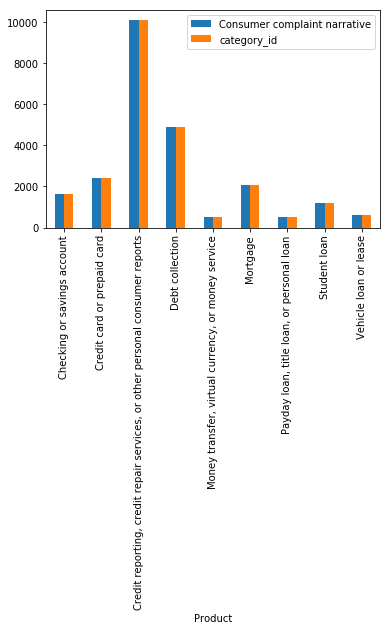

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').count().plot.bar(ylim=0)
plt.show()

## **Text Preprocessing**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(sublinear_tf=True, min_df=50, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidfVector.fit_transform(df['Consumer complaint narrative']).toarray()
labels = df.category_id
features.shape

(23908, 5990)

In [12]:
# We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfVector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print(" Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Checking or savings account':
 Most correlated unigrams:
. checking
. deposit
 Most correlated bigrams:
. 00 bonus
. checking account
# 'Credit card or prepaid card':
 Most correlated unigrams:
. express
. card
 Most correlated bigrams:
. american express
. credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
 Most correlated unigrams:
. experian
. report
 Most correlated bigrams:
. report understanding
. credit report
# 'Debt collection':
 Most correlated unigrams:
. collection
. debt
 Most correlated bigrams:
. collect debt
. collection agency
# 'Money transfer, virtual currency, or money service':
 Most correlated unigrams:
. tickets
. paypal
 Most correlated bigrams:
. sent money
. paypal account
# 'Mortgage':
 Most correlated unigrams:
. escrow
. mortgage
 Most correlated bigrams:
. escrow account
. loan modification
# 'Payday loan, title loan, or personal loan':
 Most correlated unigrams:
. loan
. payday
 Most correlated bigrams:
. 00 l

##  Selection of Multi-Class Classifier

**WE are using Logistic Regression, RandomForestClassifier, LinearSVC, MultinomialNB**


In [13]:
X_train = features
Y_train = labels

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

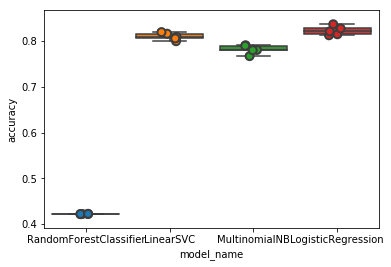

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

# **Comparison of model performance**
**Linear Regression performs best**

In [15]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.810150
LogisticRegression        0.822656
MultinomialNB             0.781708
RandomForestClassifier    0.422034
Name: accuracy, dtype: float64

# **Splitting data for prediction**

In [16]:

from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# **Confusion Matrix**

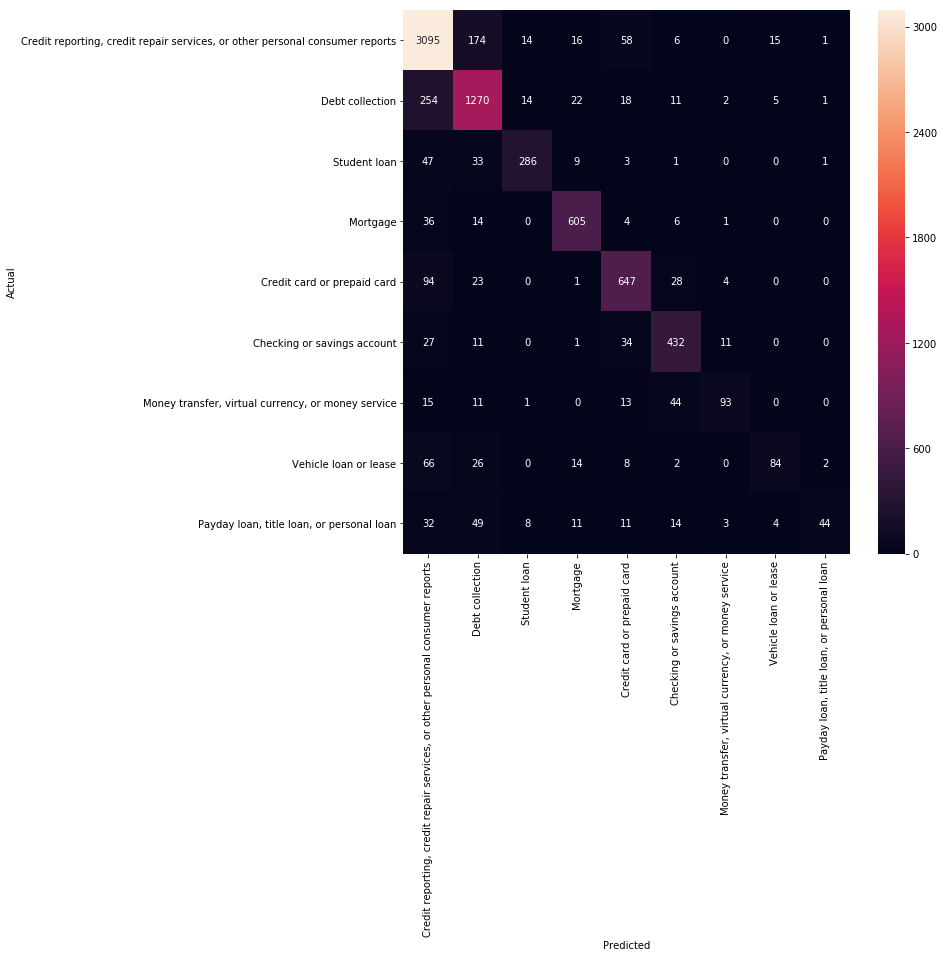

In [17]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Model Evaluation**

In [19]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.84      0.92      0.88      3379
                                                             Debt collection       0.79      0.80      0.79      1597
                                                                Student loan       0.89      0.75      0.81       380
                                                                    Mortgage       0.89      0.91      0.90       666
                                                 Credit card or prepaid card       0.81      0.81      0.81       797
                                                 Checking or savings account       0.79      0.84      0.82       516
                          Money transfer, virtual currency, or money service       0.82      0.53      0.64       177
                                                       

In [34]:
# Some manual tests for new input data
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I have no money to pay my tuition",
         ]
text_features = tfidfVector.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

